In [4]:
#import 
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
df = pd.read_csv('data/Admission_Predict_Ver1.1.csv')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
X = df.drop(columns=['Chance of Admit ', 'Serial No.'],axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [8]:
y = df['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [9]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ("StandardScaler", numerical_transformer, num_features)
])

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(500, 7)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [13]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [14]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor()
    #eval_metric='rmse', use_label_encoder=False
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test) 

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.0594
- Mean Absolute Error: 0.0425
- Mean Squared Error: 0.0035
- R2 Score: 0.8211
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0609
- Mean Absolute Error: 0.0427
- Mean Squared Error: 0.0037
- R2 Score: 0.8188


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0594
- Mean Absolute Error: 0.0425
- Mean Squared Error: 0.0035
- R2 Score: 0.8211
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0609
- Mean Absolute Error: 0.0427
- Mean Squared Error: 0.0037
- R2 Score: 0.8188


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1404
- Mean Absolute Error: 0.1133
- Mean Squared Error: 0.0197
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1435
- Mean Absolute Error: 0.1163
- Mean Squared Error: 0.0206
- R2 Score:

In [15]:
#result 
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
0,LinearRegression,0.818843
1,Ridge,0.818799
5,RandomForestRegressor,0.798477
7,CatBoostRegressor,0.789848
3,KNeighborsRegressor,0.784804
6,AdaBoostRegressor,0.759006
8,XGBRegressor,0.746692
4,DecisionTreeRegressor,0.578240
2,Lasso,-0.007248


In [16]:
#linear regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_train_pred = lin_model.predict(X_train)
score = r2_score(y_train, y_train_pred)
print("R2 score for training set: ", score)

R2 score for training set:  0.8210671369321554


Text(0, 0.5, 'Predictions')

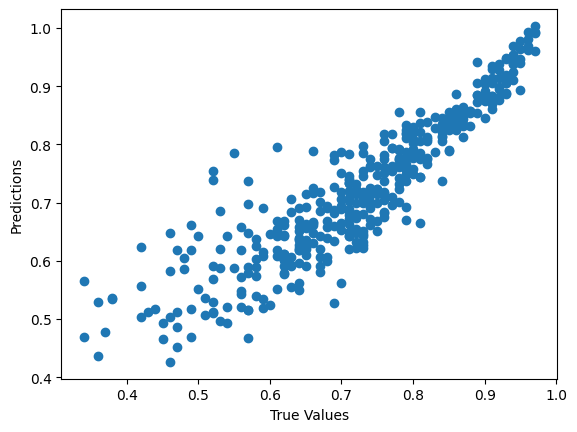

In [17]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')   

<Axes: xlabel='Chance of Admit '>

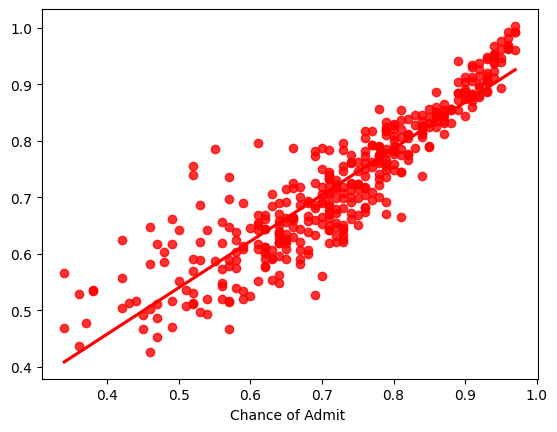

In [18]:
sns.regplot(x=y_train, y=y_train_pred, ci=None, color='red')

In [19]:
pred_df = pd.DataFrame({'True Values': y_train, 'Predictions': y_train_pred, 'Difference': y_train - y_train_pred})
pred_df 

,True Values,Predictions,Difference
249,0.77,0.793197,-0.023197
433,0.71,0.745079,-0.035079
19,0.62,0.644015,-0.024015
322,0.72,0.672748,0.047252
332,0.75,0.650946,0.099054
...,...,...,...
106,0.87,0.865058,0.004942
270,0.72,0.648443,0.071557
348,0.57,0.466838,0.103162
435,0.55,0.588193,-0.038193
